In [1]:
import sympy
import numpy as np
from einsteinpy.symbolic import MetricTensor

#import inflatox
import inflatox

In [2]:
sympy.init_printing()
φ, θ, L = sympy.symbols('φ θ L')
d = 2
coords = [φ, θ]

g = [[0 for _ in range(d)] for _ in range(d)]
g[0][0] = 1
g[1][1] = L**2*sympy.sinh(φ/L)**2

g = MetricTensor(g, coords)
display(g.tensor())

⎡1       0     ⎤
⎢              ⎥
⎢    2     2⎛φ⎞⎥
⎢0  L ⋅sinh ⎜─⎟⎥
⎣           ⎝L⎠⎦

In [3]:
m, φ0 = sympy.symbols('m φ0')
V = (1/2*m**2*(φ-φ0)**2).nsimplify()
display(V)

In [5]:
hesse = inflatox.SymbolicCalculation(coords, g, V).execute([[0,1]])

Calculating orthonormal basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculating covariant Hesse matrix...


<IPython.core.display.Math object>

Projecting the Hesse matrix on the vielbein basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
out = inflatox.Compiler(hesse, cleanup=False).compile()
out.print_sym_lookup_table()

[Symbol Dictionary]
φ -> x[0]
θ -> x[1]
m -> args[0]
φ0 -> args[1]
L -> args[2]


In [8]:
lib = inflatox.consistency_conditions.InflationCondition(out).dylib

In [14]:
p = np.array([3.4e-10, 5e-16, 1.0])
x = np.zeros((10_000, 10_000))
start_stop = np.array([
  [-2.0, 2.0],
  [-2.0, 2.0]
])

inflatox.libinflx_rs.anguelova(
  lib,
  p,
  x,
  start_stop
)

(array([   0,    0,    0, ..., 9999, 9999, 9999]), array([   0,    1,    2, ..., 9997, 9998, 9999]))
2


In [15]:
print(x)
print(np.where(np.isnan(x) == False))
print(len(np.where(x <= 1))) #praktisch nergens

[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]]
(array([   0,    0,    0, ..., 9999, 9999, 9999]), array([   0,    1,    2, ..., 9997, 9998, 9999]))
2


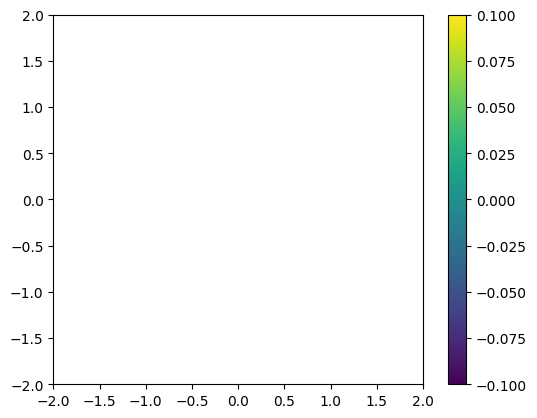

In [12]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
plt.imshow(x, extent=(*start_stop[0], *start_stop[1]))
plt.colorbar()